#AFL 4 Data Science

### Import Library

In [140]:
# Import Library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn import metrics

### Data Preparation

####**Dataset**


In [141]:
# Import Dataset
url='https://raw.githubusercontent.com/baghizzhd/DataScience/main/kc_house_data.csv'


In [142]:
df = pd.read_csv(url)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [114]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [115]:
df.shape

(21613, 21)

In [143]:
#data dihapus karena tidak menunjukkan pengaruh
df.drop(['id', 'date','zipcode'], axis=1, inplace=True)

In [144]:
print("Jumlah data awal: ",df.shape)
df.drop_duplicates(keep='first', inplace=True)
print("Jumlah data akhir: ", df.shape)


Jumlah data awal:  (21613, 18)
Jumlah data akhir:  (21608, 18)


AxesSubplot(0.125,0.125;0.775x0.755)


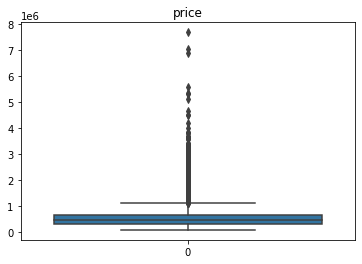

In [118]:
plt.title('price')
print(sns.boxplot(data=df['price']))

AxesSubplot(0.125,0.125;0.775x0.755)


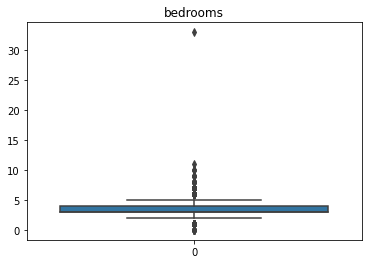

In [1532]:
plt.title('bedrooms')
print(sns.boxplot(data=df['bedrooms']))

AxesSubplot(0.125,0.125;0.775x0.755)


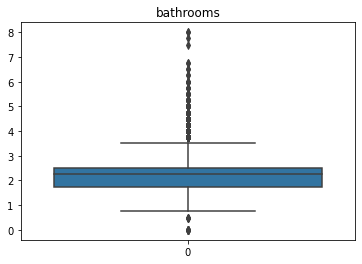

In [1533]:
plt.title('bathrooms')
print(sns.boxplot(data=df['bathrooms']))

AxesSubplot(0.125,0.125;0.775x0.755)


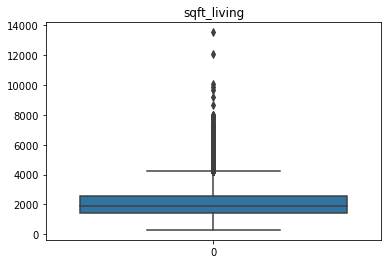

In [1534]:
plt.title('sqft_living')
print(sns.boxplot(data=df['sqft_living']))

AxesSubplot(0.125,0.125;0.775x0.755)


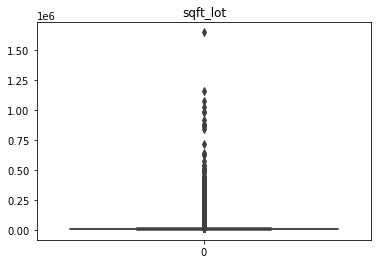

In [1535]:
plt.title('sqft_lot')
print(sns.boxplot(data=df['sqft_lot']))

AxesSubplot(0.125,0.125;0.775x0.755)


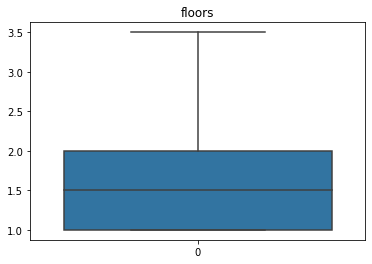

In [1551]:
plt.title('floors')
print(sns.boxplot(data=df['floors']))

AxesSubplot(0.125,0.125;0.775x0.755)


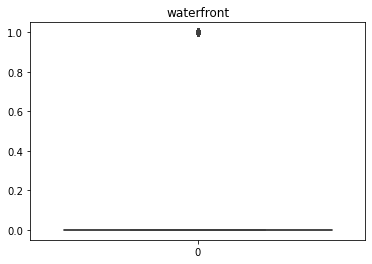

In [1552]:
plt.title('waterfront')
print(sns.boxplot(data=df['waterfront']))

AxesSubplot(0.125,0.125;0.775x0.755)


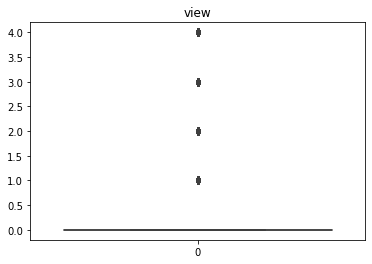

In [1549]:
plt.title('view')
print(sns.boxplot(data=df['view']))

AxesSubplot(0.125,0.125;0.775x0.755)


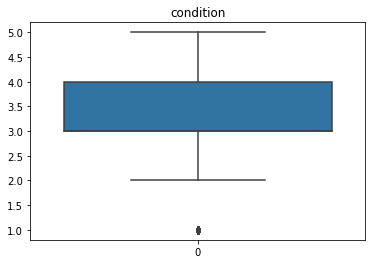

In [1548]:
plt.title('condition')
print(sns.boxplot(data=df['condition']))

AxesSubplot(0.125,0.125;0.775x0.755)


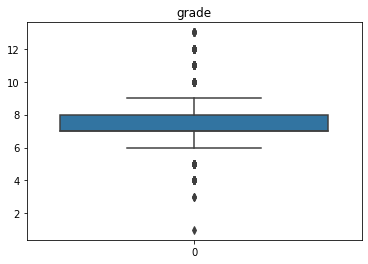

In [1547]:
plt.title('grade')
print(sns.boxplot(data=df['grade']))

AxesSubplot(0.125,0.125;0.775x0.755)


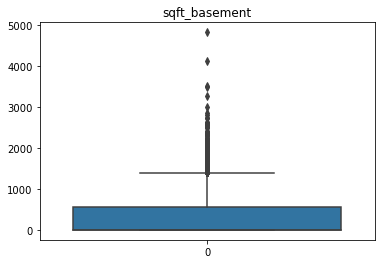

In [1550]:
plt.title('sqft_basement')
print(sns.boxplot(data=df['sqft_basement']))

AxesSubplot(0.125,0.125;0.775x0.755)


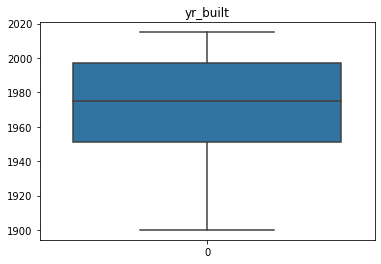

In [1546]:
plt.title('yr_built')
print(sns.boxplot(data=df['yr_built']))

AxesSubplot(0.125,0.125;0.775x0.755)


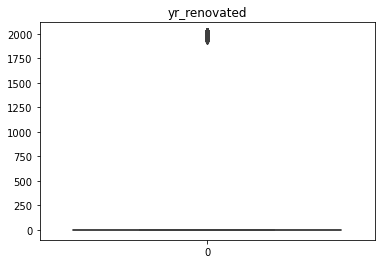

In [1545]:
plt.title('yr_renovated')
print(sns.boxplot(data=df['yr_renovated']))

AxesSubplot(0.125,0.125;0.775x0.755)


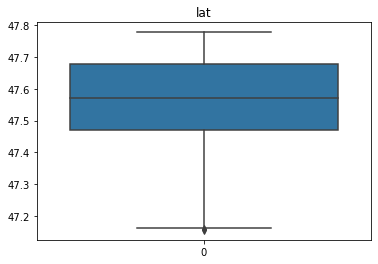

In [1544]:
plt.title('lat')
print(sns.boxplot(data=df['lat']))

AxesSubplot(0.125,0.125;0.775x0.755)


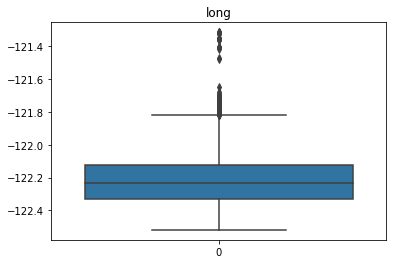

In [1543]:
plt.title('long')
print(sns.boxplot(data=df['long']))

AxesSubplot(0.125,0.125;0.775x0.755)


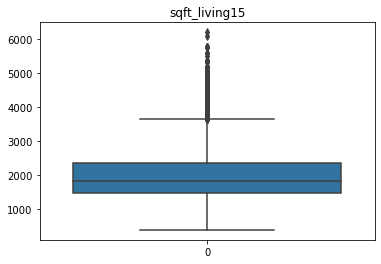

In [1540]:
plt.title('sqft_living15')
print(sns.boxplot(data=df['sqft_living15']))

AxesSubplot(0.125,0.125;0.775x0.755)


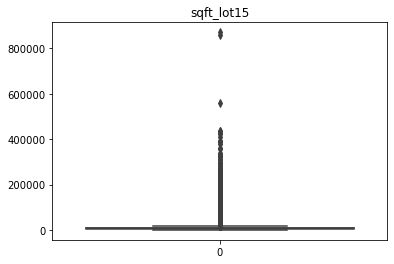

In [1539]:
plt.title('sqft_lot15')
print(sns.boxplot(data=df['sqft_lot15']))

AxesSubplot(0.125,0.125;0.775x0.755)


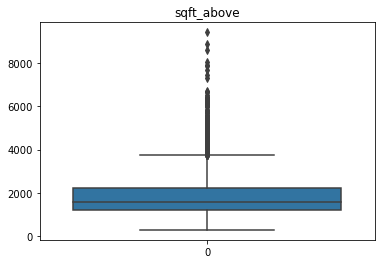

In [1538]:
plt.title('sqft_above')
print(sns.boxplot(data=df['sqft_above']))

In [145]:
# Menghilangkan outlier (contoh dari data price)
df['z_score']=stats.zscore(df['price'])
df.drop(df.loc[df['z_score'].abs()>=3].index, inplace=True)
df.drop(['z_score'], axis=1, inplace=True)

In [120]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.120200e+04,21202.000000,21202.000000,21202.000000,2.120200e+04,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000,21202.000000
mean,5.068478e+05,3.353787,2.086419,2032.141072,1.483727e+04,1.486912,0.004339,0.205547,3.407697,7.604047,1751.332704,280.808367,1970.926799,80.008726,47.558945,-122.213643,1960.364400,12643.837515
std,2.593498e+05,0.921402,0.737332,837.209338,4.041437e+04,0.538531,0.065731,0.707764,0.649145,1.111342,772.643359,425.396348,29.281454,391.521798,0.139481,0.141541,655.369646,27227.141503
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5.006000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,47.467000,-122.329000,1480.000000,5080.000000
50%,4.468750e+05,3.000000,2.250000,1890.000000,7.560000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1975.000000,0.000000,47.569900,-122.231000,1820.000000,7577.000000
75%,6.275000e+05,4.000000,2.500000,2500.000000,1.049425e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2170.000000,540.000000,1996.000000,0.000000,47.678775,-122.124000,2330.000000,10000.000000
max,1.640000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,7320.000000,2850.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,871200.000000


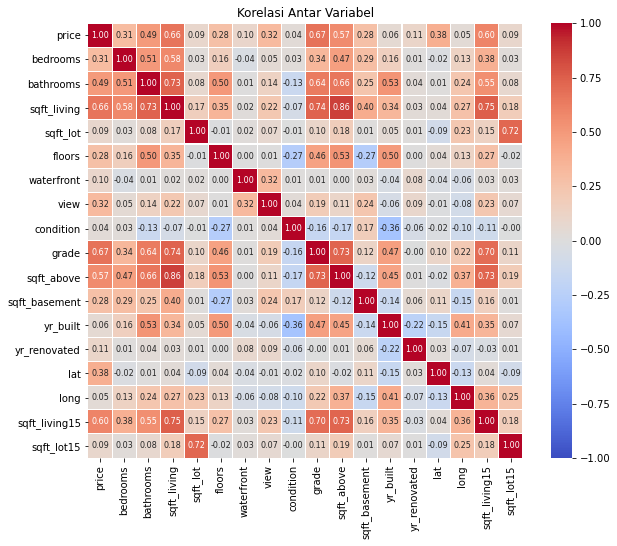

In [121]:
# Multivariate Exploratory Data Analysis
# Fungsi Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [122]:
print(df.corr())

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.311126   0.494784     0.664938  0.091303  0.278119   
bedrooms       0.311126  1.000000   0.505365     0.581160  0.029869  0.164703   
bathrooms      0.494784  0.505365   1.000000     0.734527  0.078340  0.502572   
sqft_living    0.664938  0.581160   0.734527     1.000000  0.168803  0.349925   
sqft_lot       0.091303  0.029869   0.078340     0.168803  1.000000 -0.013248   
floors         0.278119  0.164703   0.502572     0.349925 -0.013248  1.000000   
waterfront     0.100948 -0.036252   0.006131     0.016024  0.023141  0.001604   
view           0.318196  0.053681   0.135340     0.220794  0.070562  0.005574   
condition      0.036604  0.025382  -0.132816    -0.069396 -0.006533 -0.270438   
grade          0.672193  0.340081   0.639437     0.738385  0.102117  0.456599   
sqft_above     0.567116  0.468933   0.658685     0.863346  0.176435  0.528743   
sqft_basement  0.278595  0.2

In [146]:
#menghapus nilai yang tidak berpengaruh terhadap price
#saya masih menggunakan yr_built karena menunjukan pengaruh yang cukup besar terhadap R-square 
df.drop(['sqft_lot15','sqft_basement','floors','long','sqft_lot','condition','yr_renovated','waterfront','bedrooms','bathrooms','yr_built'], axis=1, inplace=True)

<Figure size 720x576 with 0 Axes>

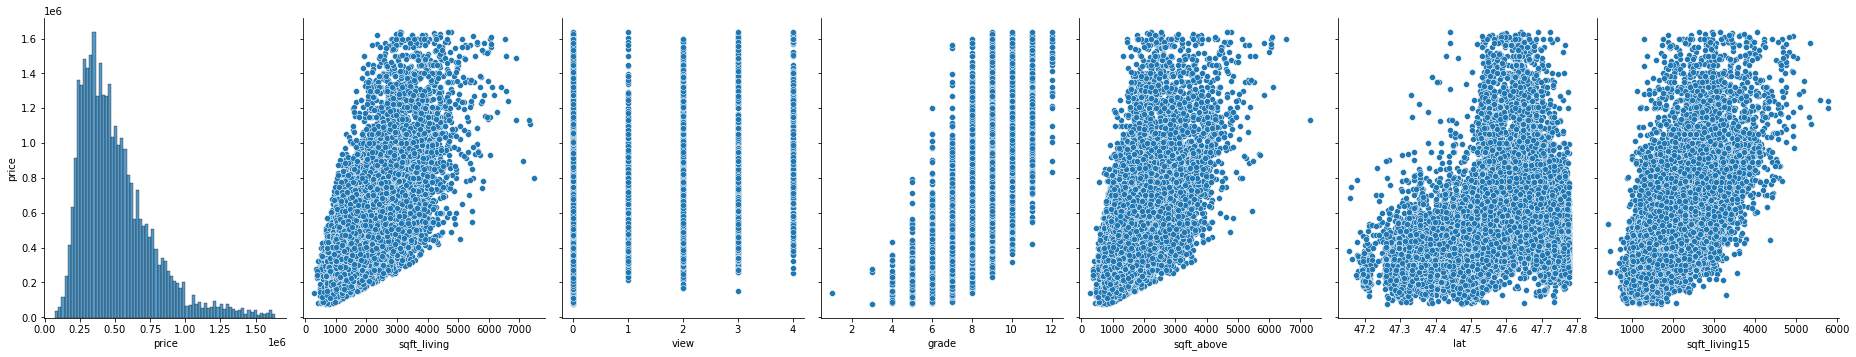

In [153]:
#persebaran data
plt.figure(figsize=(10,8))
sns.pairplot(data=df,x_vars=['price', 'sqft_living', 'view','grade','sqft_above','lat','sqft_living15'], y_vars=['price'], height=5, aspect=0.75)


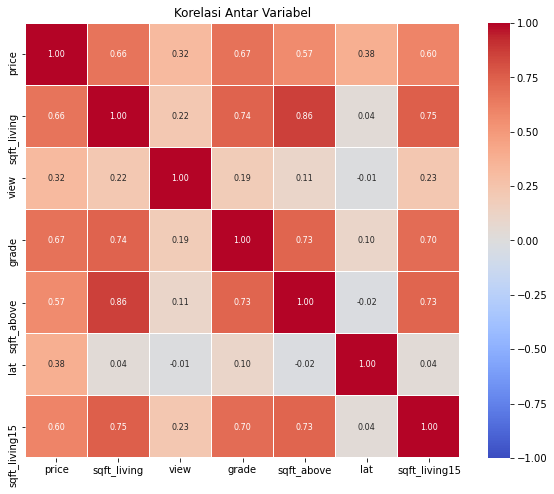

In [147]:
# Multivariate Exploratory Data Analysis
# Fungsi Heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmin=-1, vmax=1, cmap = "coolwarm", annot=True, annot_kws={"size":8}, fmt='.2f', linewidths=0.1, square = True)
plt.title("Korelasi Antar Variabel")
plt.show()

In [148]:
df.shape

(21202, 7)

In [149]:
# variabel independent
X = df.iloc[:, 1:].values
# Variabel Dependent
y = df.iloc[:, :1].values

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [151]:
# Model regresi linear
line = LinearRegression()
line.fit(X_train, y_train)
# Memasukkan nilai prediksi dari data-test
y_pred = line.predict(X_test)

In [152]:
# Memasukkan nilai konstanta pada model
X = sm.add_constant(X)
# Mencetak hasil regresi dan penilaian model
model = sm.OLS(y, X).fit()
print(model.summary())
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Model Score: ', line.score(np.array(X_test), y_test))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     6808.
Date:                Mon, 13 Jun 2022   Prob (F-statistic):               0.00
Time:                        06:27:46   Log-Likelihood:            -2.8300e+05
No. Observations:               21202   AIC:                         5.660e+05
Df Residuals:                   21195   BIC:                         5.661e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.015e+07    3.6e+05    -83.671      0.0

In [154]:
#Pada perhitungan nilai MAPE
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape
# Prediksi pada data-test
LR_Test_predict = line.predict(X_test) 
 
# Menghitung nilai MAPE
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

MAPE:  23.26787647903488


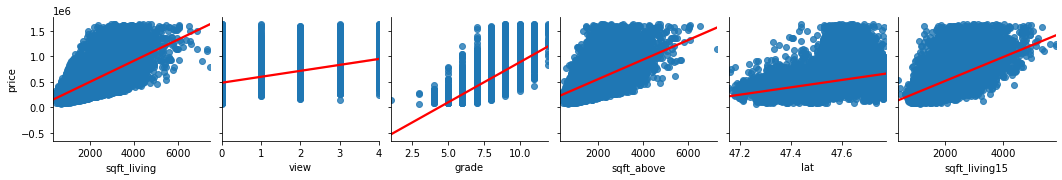

In [155]:
sns.pairplot(df, x_vars=[ 'sqft_living', 'view','grade','sqft_above','lat','sqft_living15'], y_vars=['price'], kind='reg', plot_kws={'line_kws':{'color':'red'}})

In [131]:
#buat memisah data, karena masih dalam array
real_y_pred = []
real_y_test = []
for items in y_pred:
  real_y_pred.append(items[0])
for items in y_test:
    real_y_test.append(items[0])

In [156]:
compare = pd.DataFrame({'Prediction' : real_y_pred, 'Actual' : real_y_test})
print(compare)

         Prediction    Actual
0     311897.262700  360000.0
1     768167.639867  750000.0
2     504069.873474  355000.0
3     283150.166104  365000.0
4     626124.383257  475000.0
...             ...       ...
4236  399866.760469  415000.0
4237  418056.974413  465000.0
4238  590867.595386  665000.0
4239  343570.222650  370228.0
4240  719988.465558  480000.0

[4241 rows x 2 columns]


In [48]:
df

,price,sqft_living,view,grade,sqft_above,yr_built,lat,sqft_living15
0,221900.0,1180,0,7,1180,1955,47.5112,1340
1,538000.0,2570,0,7,2170,1951,47.7210,1690
2,180000.0,770,0,6,770,1933,47.7379,2720
3,604000.0,1960,0,7,1050,1965,47.5208,1360
4,510000.0,1680,0,8,1680,1987,47.6168,1800
...,...,...,...,...,...,...,...,...
21608,360000.0,1530,0,8,1530,2009,47.6993,1530
21609,400000.0,2310,0,8,2310,2014,47.5107,1830
21610,402101.0,1020,0,7,1020,2009,47.5944,1020
21611,400000.0,1600,0,8,1600,2004,47.5345,1410


In [135]:
np.set_printoptions(precision=3)
print("Prediksi Harga Rumah: ", line.predict([[1800,0,7,1130,48.0007,1510]]))

Prediksi Harga Rumah:  [[696330.536]]


In [136]:
np.set_printoptions(precision=3)
print("Prediksi Harga Rumah: ", line.predict([[1150,0,6,1130,47.7701,1510]]))

Prediksi Harga Rumah:  [[405817.31]]
